In [ ]:
# notebook that demonstrates SP-BAND and compares it visually to previous methods

In [2]:
import numpy as np
import fooof
import matplotlib.pyplot as plt
import SPBAND.parameterize_spectra as spband

# Load in the Data

In [3]:
example_spectra = np.load('../data/example_comparison_spectra.npz')
sample_freqs = example_spectra['sample_freqs']
sample_psd = example_spectra['sample_psd']
channels = example_spectra['channels']
channel = 'C4'
chdx = np.where(channels == channel)[0][0]

## Quick Look at the Data

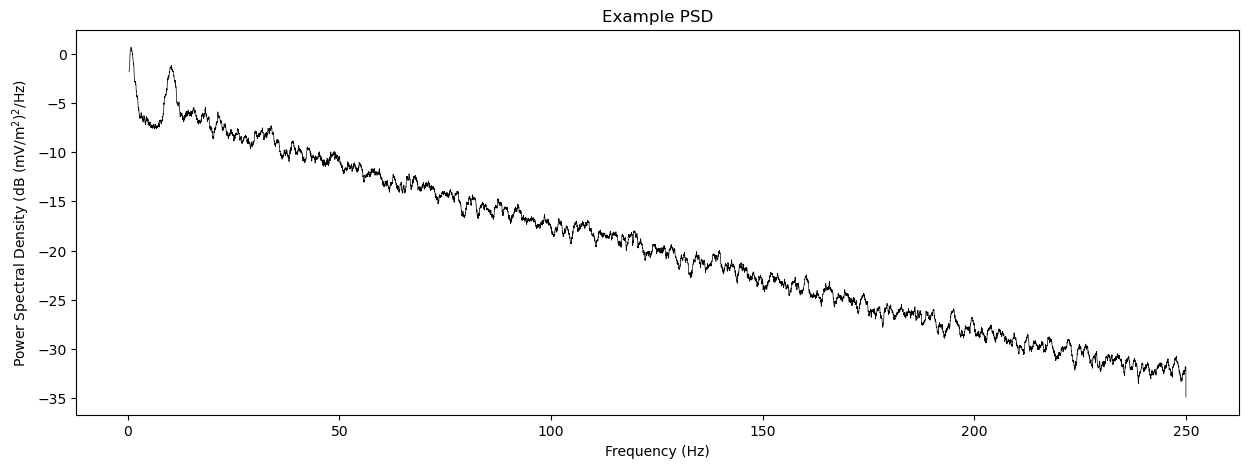

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(sample_freqs, 10*np.log10(1e6*sample_psd[chdx, :]), color='black', linewidth=.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB (mV/m$^2$)$^2$/Hz)')
plt.title('Example PSD')
plt.show()


(65405,) (19, 65405)


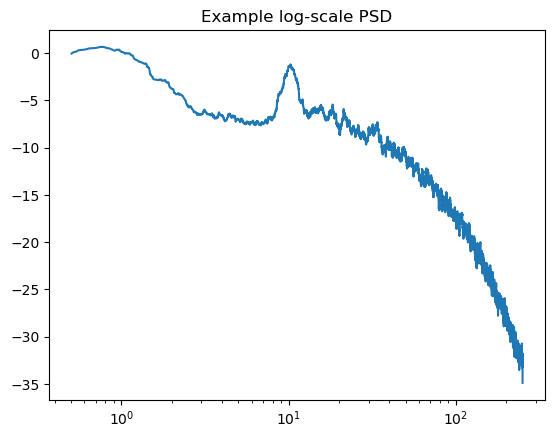

In [5]:
sample_psd = sample_psd[:, sample_freqs > 0.5]
sample_freqs = sample_freqs[sample_freqs > 0.5]
print(sample_freqs.shape, sample_psd.shape)
plt.plot(sample_freqs, 10*np.log10(sample_psd)[chdx]+60)
plt.title('Example log-scale PSD')
plt.xscale('log')
plt.show()

#  Visual Comparison of Vanilla FOOOF and the SP-BAND Algorithms

N Peaks found: 6


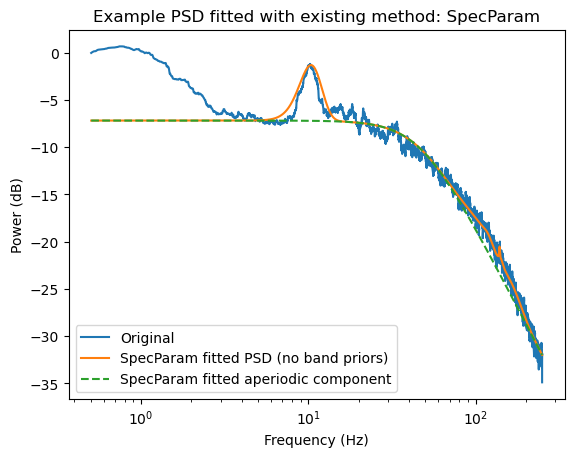

In [6]:
# Set the parameters for the band fitting based on prior expectation of the data
max_n_peaks=7
peak_width_limits=(1.0, 100.0)

fm = fooof.FOOOF(peak_width_limits=peak_width_limits, max_n_peaks=max_n_peaks, aperiodic_mode='knee', verbose=True)
fm.fit(freqs=sample_freqs, power_spectrum=sample_psd[chdx,:]) # taking forever when unconstrained. 
print(f"N Peaks found: {len(fm.peak_params_)}")
fig = plt.figure()
plt.plot(sample_freqs, 10*np.log10(sample_psd[chdx,:])+60, label='Original')
plt.plot(sample_freqs, 10*(fm._ap_fit+fm._peak_fit)+60, label='SpecParam fitted PSD (no band priors)')
plt.plot(sample_freqs, 10*(fm._ap_fit)+60, label='SpecParam fitted aperiodic component', linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.xscale('log')
plt.title('Example PSD fitted with existing method: SpecParam')
plt.show()

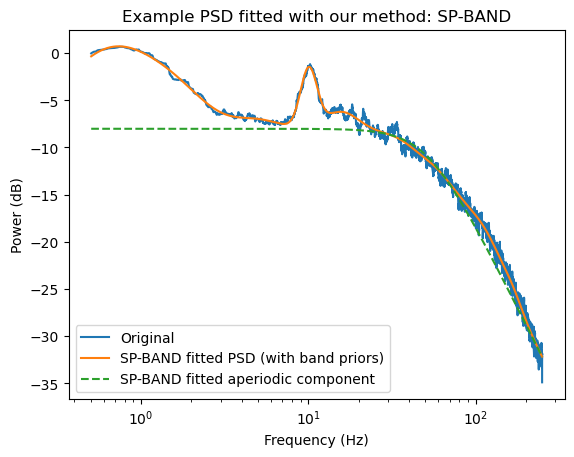

In [7]:
import importlib
importlib.reload(spband)
our_fitted_ps = spband.extract_param_spectra(sample_freqs, sample_psd[chdx,:])
our_fitted_model = our_fitted_ps.modeled_spectrum_
fig = plt.figure()
plt.plot(sample_freqs, 10*np.log10(sample_psd[chdx,:])+60, label='Original')
plt.plot(sample_freqs, 10*(our_fitted_model)+60, label='SP-BAND fitted PSD (with band priors)')
plt.plot(sample_freqs, 10*(our_fitted_ps._ap_fit)+60, label='SP-BAND fitted aperiodic component', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.xscale('log')
plt.title('Example PSD fitted with our method: SP-BAND')
plt.legend(loc='lower left')
plt.show() 

# Tune the SP-BAND Algorithm with custom band definitions

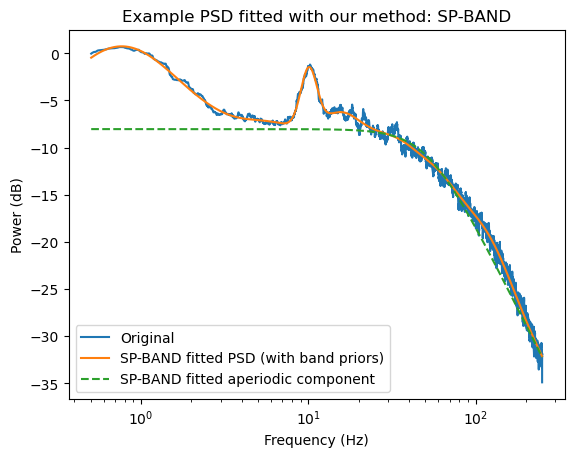

In [9]:
import importlib
importlib.reload(spband)
new_bands = [(0.3, 4), (4, 8), (8, 12), (12, 30), (30, 70), (70, 250)]
our_fitted_ps = spband.extract_param_spectra(sample_freqs, sample_psd[chdx,:], bands=new_bands)
our_fitted_model = our_fitted_ps.modeled_spectrum_
fig = plt.figure()
plt.plot(sample_freqs, 10*np.log10(sample_psd[chdx,:])+60, label='Original')
plt.plot(sample_freqs, 10*(our_fitted_model)+60, label='SP-BAND fitted PSD (with band priors)')
plt.plot(sample_freqs, 10*(our_fitted_ps._ap_fit)+60, label='SP-BAND fitted aperiodic component', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.xscale('log')
plt.title('Example PSD fitted with our method: SP-BAND')
plt.legend(loc='lower left')
plt.show() 